In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('str_bench.csv').dropna(axis=1)

In [80]:
df = df[~df['name'].str.contains('|'.join(['_mean','_median', '_stddev']))].copy()

In [81]:
df.loc[:,'name'] = df.name.str.replace('BENCH_','')
df.loc[:,'name'] = df.name.str.replace('/[0-9]','',regex=True)

In [69]:
df

,name,iterations,real_time,cpu_time,time_unit
0,ABSEIL_STRCAT,17092915,40.2925,40.2520,ns
1,ABSEIL_STRCAT,17092915,39.9406,39.9225,ns
2,ABSEIL_STRCAT,17092915,40.9639,40.7825,ns
3,ABSEIL_STRCAT,17092915,41.7861,41.5665,ns
4,ABSEIL_STRCAT,17092915,40.5428,40.4680,ns
...,...,...,...,...,...
499,FMT,10885098,68.6698,68.6696,ns
500,FMT,10885098,67.8662,67.8664,ns
501,FMT,10885098,67.0064,67.0066,ns
502,FMT,10885098,67.4362,67.4364,ns


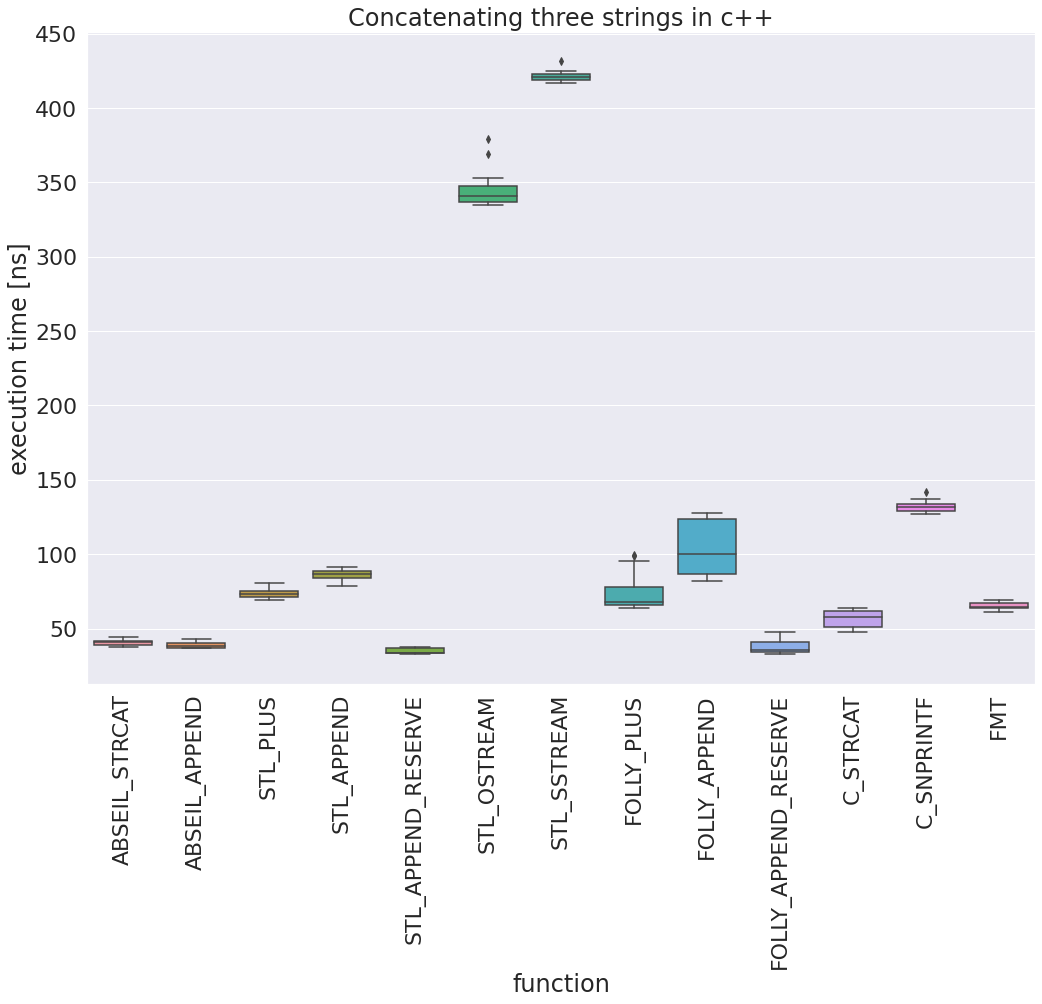

In [70]:
sns.set(rc={'figure.figsize':(17,12)})
sns.set(font_scale=2) 
ax = sns.boxplot(x="name", y="real_time", data=df)
ax.set_title('Concatenating three strings in c++')
ax.set(xlabel='function', ylabel='execution time [ns]')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.figure.savefig("img/boxplot.png")

In [77]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby('name').mean()['real_time'].sort_values()

name
STL_APPEND_RESERVE      34.80
FOLLY_APPEND_RESERVE    37.29
ABSEIL_APPEND           38.85
ABSEIL_STRCAT           40.28
C_STRCAT                56.43
FMT                     65.05
STL_PLUS                73.35
FOLLY_PLUS              73.59
STL_APPEND              86.25
FOLLY_APPEND           104.24
C_SNPRINTF             131.93
STL_OSTREAM            343.90
STL_SSTREAM            421.17
Name: real_time, dtype: float64